In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

star = pd.read_csv(r'C:\Users\kietb\OneDrive\Desktop\Suffering\Undergrad\ASTR400A\Data\Ben_42_Msun\MESA-Web_Job_10202435304\trimmed_history.data', delim_whitespace=True, header=4)
star.columns

C:\Users\kietb\AppData\Local\Temp\ipykernel_24124\2481834027.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  star = pd.read_csv(r'C:\Users\kietb\OneDrive\Desktop\Suffering\Undergrad\ASTR400A\Data\Ben_42_Msun\MESA-Web_Job_10202435304\trimmed_history.data', delim_whitespace=True, header=4)


Index(['model_number', 'star_age', 'star_mass', 'log_L', 'log_R', 'log_Teff',
       'log_center_T', 'log_center_Rho', 'log_center_P', 'center_h1',
       'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16',
       'center_ne20', 'center_mg24', 'center_si28', 'center_s32',
       'center_ar36', 'center_ca40', 'center_ti44', 'center_cr48',
       'center_fe52', 'center_fe54', 'center_fe56', 'center_ni56',
       'center_degeneracy', 'center_ye', 'center_entropy',
       'compactness_parameter', 'dynamic_timescale', 'kh_timescale',
       'nuc_timescale', 'pp', 'cno', 'tri_alfa', 'log_LH', 'log_LHe', 'log_LZ',
       'log_Lneu', 'he_core_mass', 'c_core_mass', 'o_core_mass',
       'si_core_mass', 'fe_core_mass', 'he_core_radius', 'c_core_radius',
       'o_core_radius', 'si_core_radius', 'fe_core_radius',
       'max_abs_v_velocity', 'surf_avg_omega_div_omega_crit',
       'log_total_angular_momentum', 'surf_avg_omega', 'surf_avg_v_rot',
       'star_mdot'],
      dtype=

In [2]:
# Find center_h1 at ZAM
target_age = 4.457743e+04
closest_row_idx = (star['star_age'] - target_age).abs().idxmin()
center_h1 = star.loc[closest_row_idx, 'center_h1']
print(center_h1)

0.6966888748268013


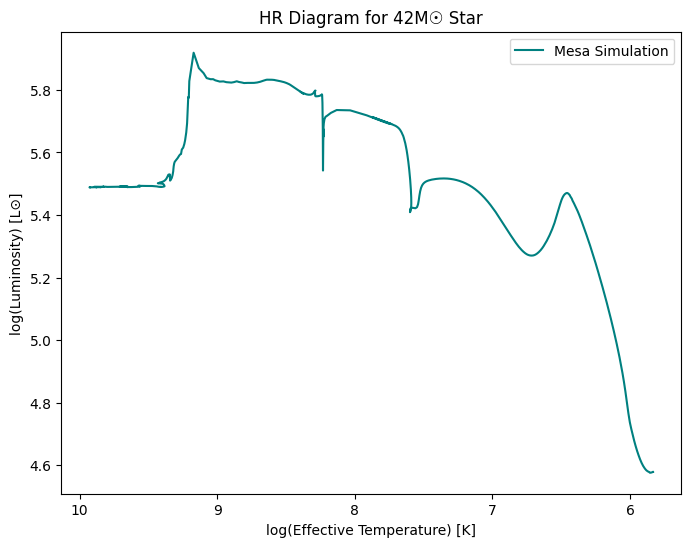

In [3]:
# LogT vs LogL
LogT = star['log_center_T']
LogL = star['log_L']

# Plot 
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot (LogT, LogL, label  ='Mesa Simulation', color = 'teal')

# Invert the x-axis (HR diagrams go from high to low temp)
plt.gca().invert_xaxis()

# Labels and title
ax.set_xlabel('log(Effective Temperature) [K]')
ax.set_ylabel('log(Luminosity) [L⊙]')
ax.set_title('HR Diagram for 42M☉ Star')
ax.legend()

# Show the plot
plt.show()


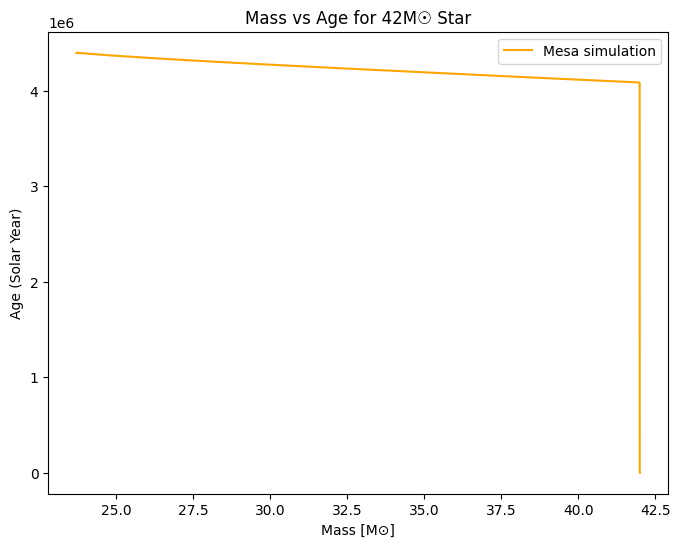

In [ ]:
# mass vs age 
mass = star['star_mass']
age = star['star_age']

# Plot 
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot (mass, age, label = 'Mesa simulation', color = 'orange')

# Labels and title
ax.set_xlabel('Mass [M⊙]')
ax.set_ylabel('Age (Solar Year)')
ax.set_title('Mass vs Age for 42M☉ Star')
ax.legend()

# Show the plot
plt.show()


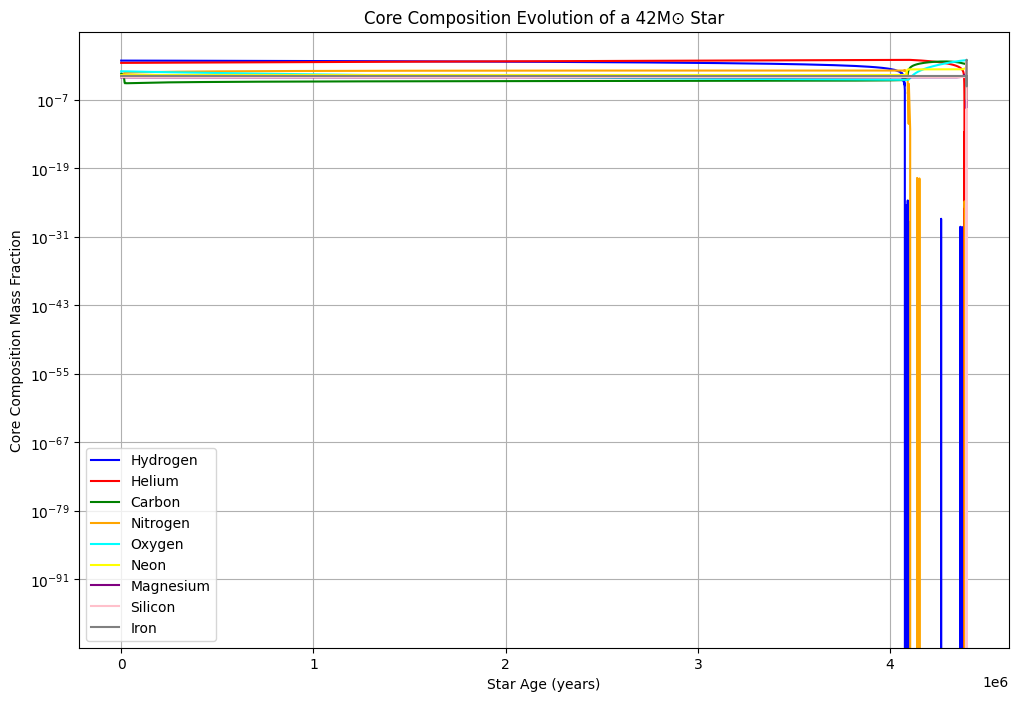

In [8]:
# Core Composition at Each Evolutionary Stage:
plt.figure(figsize=(12, 8))

# Element Compositions vs Time
plt.plot(star['star_age'], star['center_h1'], label = 'Hydrogen', color = 'blue')
plt.plot(star['star_age'], star['center_he4'], label = 'Helium', color = 'red')
plt.plot(star['star_age'], star['center_c12'], label = 'Carbon', color = 'green')
plt.plot(star['star_age'], star['center_n14'], label = 'Nitrogen', color = 'orange')
plt.plot(star['star_age'], star['center_o16'], label = 'Oxygen', color = 'cyan')
plt.plot(star['star_age'], star['center_ne20'], label = 'Neon', color = 'yellow')
plt.plot(star['star_age'], star['center_mg24'], label = 'Magnesium', color = 'purple')
plt.plot(star['star_age'], star['center_si28'], label = 'Silicon', color = 'pink')
plt.plot(star['star_age'], star['center_fe56'], label = 'Iron', color = 'grey')


plt.yscale('log') # log scale for better display
plt.xlabel('Star Age (years)')
plt.ylabel('Core Composition Mass Fraction')
plt.title('Core Composition Evolution of a 42M⊙ Star')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Hydrogen Burning Duration: 4.02e+06 years
Helium Burning Duration: 4.40e+06 years
Carbon Burning Duration: 3.03e+05 years
Nitrogen Burning Duration: 3.37e+06 years
Oxygen Burning Duration: 2.46e+05 years
Neon Burning Duration: 3.11e+05 years
Magnesium Burning Duration: 5.03e+00 years
Silicon Burning Duration: 2.88e-01 years
Iron Burning Duration: 8.75e-04 years


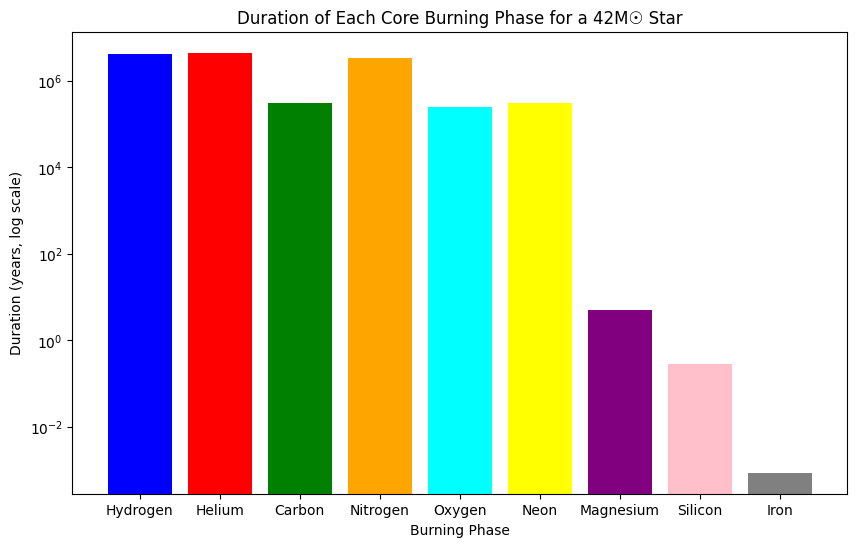

In [10]:
import numpy as np


star_age = star['star_age']
H = star['center_h1']
He = star['center_he4']
C = star['center_c12']
N = star['center_n14']
O = star['center_o16']
Ne = star['center_ne20']
Mg = star['center_mg24']
Si = star['center_si28']
Fe = star['center_fe56']

# Function to find phase duration
def calculate_phase_duration(age, abundance, threshold=0.01): # Pick threshold as a small amount, below threshold => elements no longer there
    start_age = age[abundance > threshold].iloc[0] # Take the starting age: the first item in the age list where the element is present
    end_age = age[abundance > threshold].iloc[-1] # Take the ending age: the last item in the age list where the element is present
    return end_age - start_age

# Calculate durations 
hydrogen_burning = calculate_phase_duration(star_age, H)
helium_burning = calculate_phase_duration(star_age, He)
carbon_burning = calculate_phase_duration(star_age, C)
nitrogen_burning = calculate_phase_duration(star_age, N)
oxygen_burning = calculate_phase_duration(star_age, O)
neon_burning = calculate_phase_duration(star_age, Ne)
magnesium_burning = calculate_phase_duration(star_age, Mg)
silicon_burning = calculate_phase_duration(star_age, Si)
iron_burning = calculate_phase_duration(star_age, Fe)

# Print durations
print(f"Hydrogen Burning Duration: {hydrogen_burning:.2e} years")
print(f"Helium Burning Duration: {helium_burning:.2e} years")
print(f"Carbon Burning Duration: {carbon_burning:.2e} years")
print(f"Nitrogen Burning Duration: {nitrogen_burning:.2e} years")
print(f"Oxygen Burning Duration: {oxygen_burning:.2e} years")
print(f"Neon Burning Duration: {neon_burning:.2e} years")
print(f"Magnesium Burning Duration: {magnesium_burning:.2e} years")
print(f"Silicon Burning Duration: {silicon_burning:.2e} years")
print(f"Iron Burning Duration: {iron_burning:.2e} years")

# Plot
phases = ['Hydrogen', 'Helium', 'Carbon', 'Nitrogen', 'Oxygen', 'Neon', 'Magnesium', 'Silicon', 'Iron']
durations = [hydrogen_burning, helium_burning, carbon_burning, nitrogen_burning, oxygen_burning, neon_burning, magnesium_burning, silicon_burning, iron_burning]

plt.figure(figsize=(10, 6))
plt.bar(phases, durations, color=['blue', 'red', 'green', 'orange', 'cyan', 'yellow', 'purple', 'pink', 'grey'])
plt.yscale('log')
plt.xlabel("Burning Phase")
plt.ylabel("Duration (years, log scale)")
plt.title("Duration of Each Core Burning Phase for a 42M☉ Star")
plt.show()
